
# Exploration & Wackernagel reproduction
---



In [ ]:
from google.colab import files
import pandas as pd

# Upload files from your local system
uploaded = files.upload()

path = '/content/Public Data.xlsx'
df = pd.read_excel(path, sheet_name='Country Results (2022 estimate)')

column_names = df.iloc[21]
df.columns = column_names

# Keep rows from index 22 onward (since Python uses 0-based indexing) and columns up to but not including column 36
df = df.iloc[22:, :33]

# Display the first few rows of the filtered dataframe
print(df.head())

21              Country Data Quality       SDGi Life Exectancy    HDI  \
22          Afghanistan           3A  52.488008         61.982  0.478   
23              Albania           3A  71.625673         76.463  0.796   
24              Algeria           3A  71.544276         76.377  0.745   
25               Angola           3A  50.943189         61.643  0.586   
26  Antigua and Barbuda           2B        NaN         78.497  0.788   

21 Per Capita GDP                     Region Income Group  \
22            NaN   Middle East/Central Asia           LI   
23        14888.8               Other Europe           UM   
24        11136.7                     Africa           UM   
25        6303.51                     Africa           LM   
26        18748.8  Central America/Caribbean           HI   

21 Population (millions) Cropland Footprint  ...  Cropland Grazing land  \
22                40.754           0.327735  ...  0.327735     0.144313   
23                 2.866           0.600881 

In [ ]:
print(column_names)

Unnamed: 0                                               Country
Unnamed: 1                                          Data Quality
Unnamed: 2                                                  SDGi
Unnamed: 3                                        Life Exectancy
Unnamed: 4                                                   HDI
Unnamed: 5                                        Per Capita GDP
Unnamed: 6                                                Region
Unnamed: 7                                          Income Group
Unnamed: 8                                 Population (millions)
Unnamed: 9                                    Cropland Footprint
Unnamed: 10                                    Grazing Footprint
Unnamed: 11                             Forest Product Footprint
Unnamed: 12                                     Carbon Footprint
Unnamed: 13                                       Fish Footprint
Unnamed: 14                                        Built up land
Unnamed: 15              

21              Country Data Quality       SDGi Life Exectancy    HDI  \
22          Afghanistan           3A  52.488008         61.982  0.478   
23              Albania           3A  71.625673         76.463  0.796   
24              Algeria           3A  71.544276         76.377  0.745   
25               Angola           3A  50.943189         61.643  0.586   
26  Antigua and Barbuda           2B        NaN         78.497  0.788   

21 Per Capita GDP                     Region Income Group  \
22            NaN   Middle East/Central Asia           LI   
23        14888.8               Other Europe           UM   
24        11136.7                     Africa           UM   
25        6303.51                     Africa           LM   
26        18748.8  Central America/Caribbean           HI   

21 Population (millions) Cropland Footprint  ... Grazing land Forest land  \
22                40.754           0.327735  ...     0.144313    0.012981   
23                 2.866           0.600

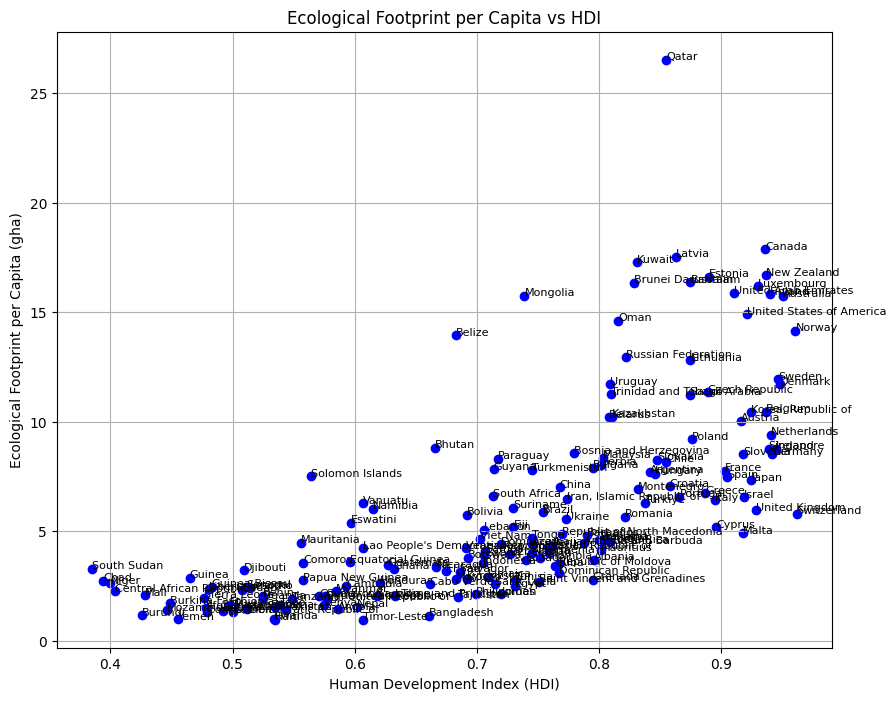

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

hdi_column = 'HDI'

footprint = 'Total Ecological Footprint'
df[footprint] = df['Total Ecological Footprint (Production)'] + df['Total Ecological Footprint (Consumption)']

# Display the first few rows of the DataFrame to verify the new column has been added
print(df.head())

footprint_column = 'footprint'

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Create a scatter plot with switched axes
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color='blue')

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Ecological Footprint per Capita (gha)')
plt.title('Ecological Footprint per Capita vs HDI')

# Optionally, annotate each point with the country name
for i in range(df_cleaned.shape[0]):
    plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=8)

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
!pip install adjustText

<ipython-input-47-d7d15201bf22>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)


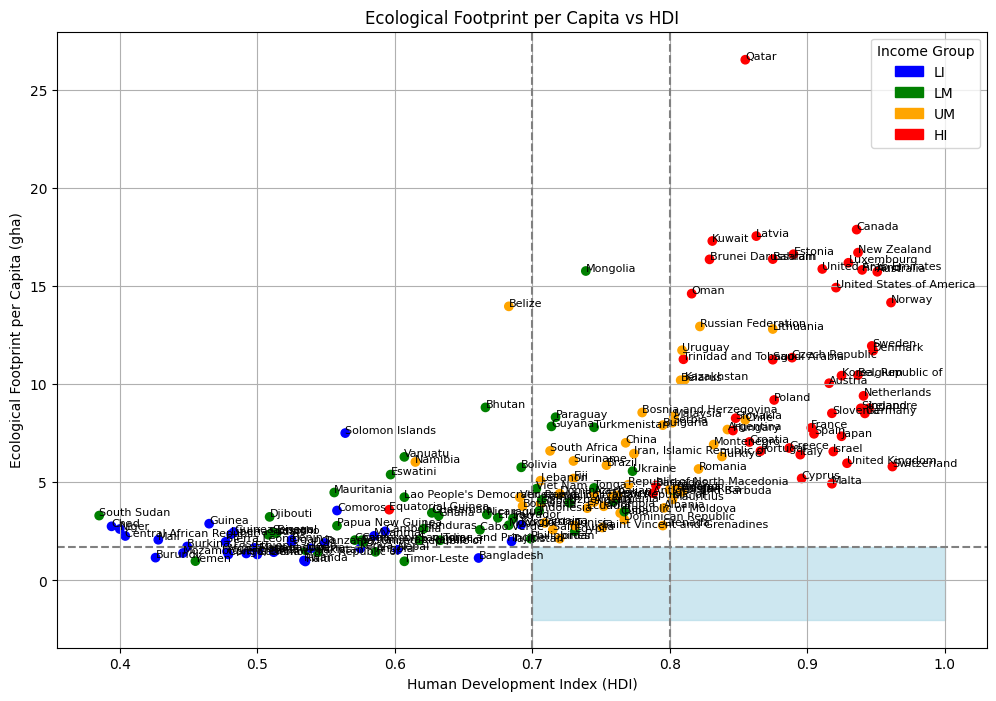

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development
biocapacity_threshold = 1.7  # World Biocapacity per Person (can adjust based on your data)

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Create a scatter plot with switched axes and colors based on income group
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Ecological Footprint per Capita (gha)')
plt.title('Ecological Footprint per Capita vs HDI')

# Add horizontal line for world biocapacity threshold
plt.axhline(y=biocapacity_threshold, color='gray', linestyle='--', label='World Biocapacity Threshold (1.7 gha)')

# Add vertical line for HDI threshold
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[-2, biocapacity_threshold], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.6, label='Sustainable Development Quadrant')

# Optionally, annotate each point with the country name
for i in range(df_cleaned.shape[0]):
    plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=8)

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Make sure to create a clean copy of the dataframe
df_cleaned = df_cleaned.copy()

# Corrected column names based on your data
corrected_biocapacity_column = 'Total biocapacity '
corrected_population_column = 'Population (millions)'

# Convert relevant columns to numeric, using .loc to avoid the warning
df_cleaned.loc[:, corrected_biocapacity_column] = pd.to_numeric(df_cleaned[corrected_biocapacity_column], errors='coerce')
df_cleaned.loc[:, corrected_population_column] = pd.to_numeric(df_cleaned[corrected_population_column], errors='coerce')

# Calculate the total biocapacity contribution for each country
df_cleaned.loc[:, 'Total Biocapacity Contribution'] = df_cleaned[corrected_biocapacity_column] * df_cleaned[corrected_population_column]

# Calculate global totals
total_biocapacity_global = df_cleaned['Total Biocapacity Contribution'].sum()
total_population_global = df_cleaned[corrected_population_column].sum()

# Compute the global biocapacity per capita
global_biocapacity_per_capita = total_biocapacity_global / total_population_global

print(f"Global Biocapacity per Capita: {global_biocapacity_per_capita:.2f} gha")


Global Biocapacity per Capita: 1.55 gha


<ipython-input-49-6b472a7e88aa>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)


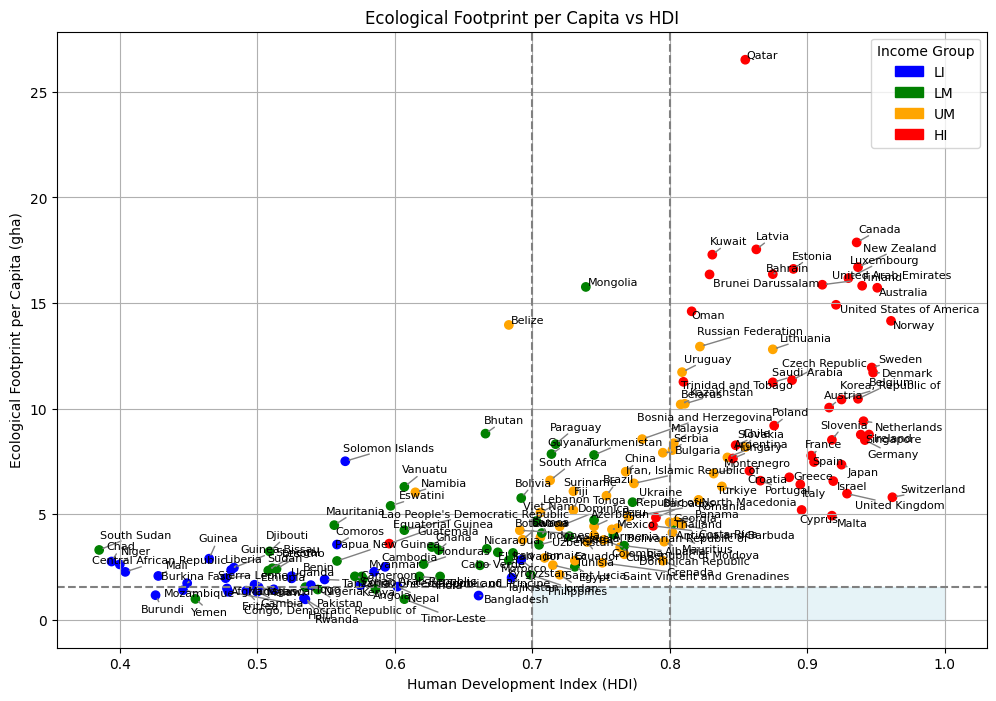

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development
biocapacity_threshold = global_biocapacity_per_capita  # Use the computed threshold

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Create a scatter plot with switched axes and colors based on income group
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Ecological Footprint per Capita (gha)')
plt.title('Ecological Footprint per Capita vs HDI')

# Add horizontal line for world biocapacity threshold
plt.axhline(y=biocapacity_threshold, color='gray', linestyle='--', label='World Biocapacity Threshold (1.7 gha)')

# Add vertical line for HDI threshold
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, biocapacity_threshold], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label all countries and adjust text to avoid overlap
texts = []
for i in range(df_cleaned.shape[0]):
    texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=8))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-50-e8b112a75f16>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)


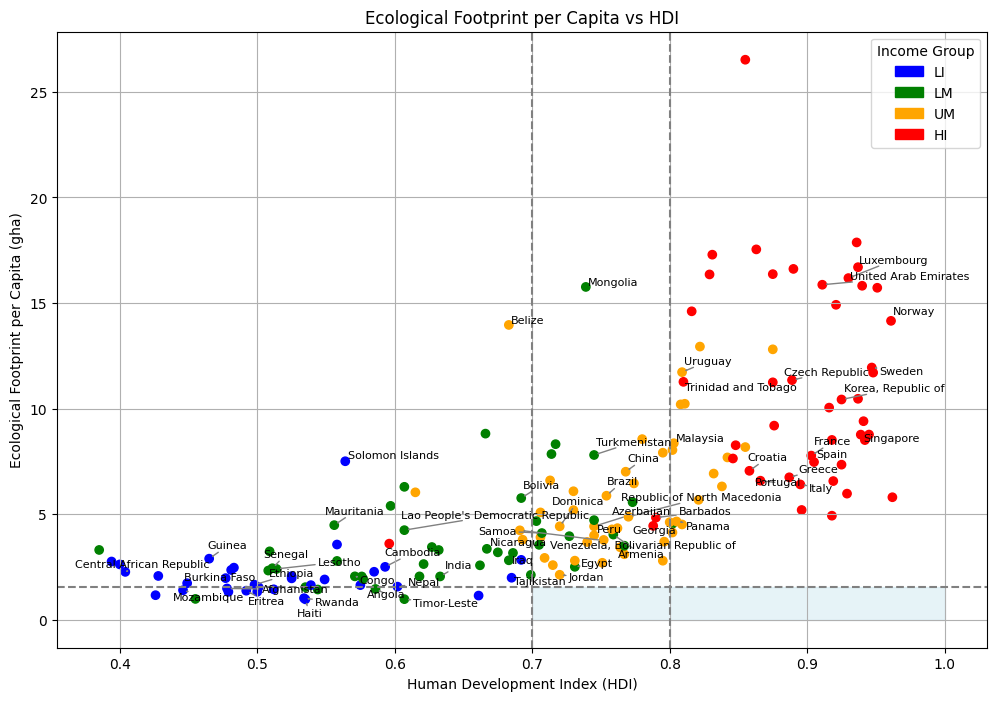

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development
biocapacity_threshold = global_biocapacity_per_capita  # Use the computed threshold

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Create a scatter plot with switched axes and colors based on income group
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Ecological Footprint per Capita (gha)')
plt.title('Ecological Footprint per Capita vs HDI')

# Add horizontal line for world biocapacity threshold
plt.axhline(y=biocapacity_threshold, color='gray', linestyle='--', label=f'World Biocapacity Threshold ({biocapacity_threshold:.2f} gha)')

# Add vertical line for HDI thresholds
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label=f'High Human Development Threshold (HDI = {hdi_threshold})')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label=f'Very High Human Development Threshold (HDI = {hdi_threshold_2})')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, biocapacity_threshold], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label every second country and adjust text to avoid overlap
texts = []
for i in range(df_cleaned.shape[0]):
    if i % 3 == 0:  # Only label every third country
        texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=8))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-51-d5e4fba0c845>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Distance to Biocapacity Line'] = np.abs(df_cleaned[footprint_column] - biocapacity_threshold)
<ipython-input-51-d5e4fba0c845>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Distance to HDI Line'] = np.minimum(np.abs(df_cleaned[hdi_column] - hdi_threshold),
<ipython-input-51-d5e4fba0c845>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

21                         Country  Distance to Quadrant
137                          Nepal              0.099141
25                          Angola              0.149198
110                          Kenya              0.152163
142                        Nigeria              0.165316
185                           Togo              0.182271
145                       Pakistan              0.197988
122                     Madagascar              0.199554
123                         Malawi              0.219205
78                        Ethiopia              0.227347
22                     Afghanistan              0.233219
75                         Eritrea              0.273410
134                     Mozambique              0.297773
85                          Gambia              0.303795
47                    Burkina Faso              0.306861
60   Congo, Democratic Republic of              0.318189
182   Tanzania, United Republic of              0.385038
180           Syrian Arab Repub

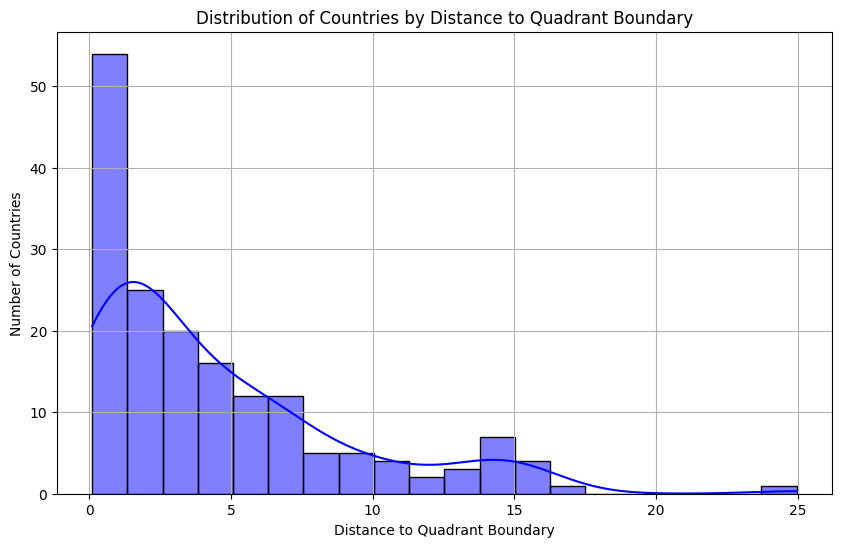

In [ ]:
import numpy as np

# Calculate the distance to the horizontal line (biocapacity threshold)
df_cleaned['Distance to Biocapacity Line'] = np.abs(df_cleaned[footprint_column] - biocapacity_threshold)

# Calculate the distance to the closest vertical line (HDI thresholds)
df_cleaned['Distance to HDI Line'] = np.minimum(np.abs(df_cleaned[hdi_column] - hdi_threshold),
                                                 np.abs(df_cleaned[hdi_column] - hdi_threshold_2))

# Calculate the combined Euclidean distance to the closest point on the quadrant boundary
df_cleaned['Distance to Quadrant'] = np.sqrt(df_cleaned['Distance to Biocapacity Line']**2 + df_cleaned['Distance to HDI Line']**2)

# Sort the dataframe by the distance to the quadrant boundary
df_sorted = df_cleaned.sort_values(by='Distance to Quadrant')

# Display the top 10 closest countries
closest_countries = df_sorted.head(55)
print(closest_countries[['Country', 'Distance to Quadrant']])

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned already has 'Distance to Quadrant' calculated

# Create a histogram of the distances to the quadrant
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Distance to Quadrant'], bins=20, kde=True, color='blue')

# Add labels and title
plt.xlabel('Distance to Quadrant Boundary')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by Distance to Quadrant Boundary')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Below both thresholds
group_1 = df_cleaned[(df_cleaned[footprint_column] < biocapacity_threshold) &
                     (df_cleaned[hdi_column] < hdi_threshold)]

# Above biocapacity but below HDI threshold
group_2 = df_cleaned[(df_cleaned[footprint_column] > biocapacity_threshold) &
                     (df_cleaned[hdi_column] < hdi_threshold_2)]

# Above both thresholds
group_3 = df_cleaned[(df_cleaned[footprint_column] > biocapacity_threshold) &
                     (df_cleaned[hdi_column] > hdi_threshold_2)]


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# After uploading, you can access the file with the filename you uploaded
# Assuming the file is named 'multidimensional_eci_data.csv'
ECI = pd.read_csv('multidimensional_eci_data.csv')

# Display the first few rows to verify
print(ECI.head())

  country              variable  x1996  x1997  x1998  x1999  x2000  x2001  \
0     AFG             eci_trade    NaN    NaN    NaN    NaN    NaN    NaN   
1     AFG  eci_trade_similarity    NaN    NaN    NaN    NaN    NaN    NaN   
2     AFG             hhi_trade    NaN    NaN    NaN    NaN    NaN    NaN   
3     AFG         entropy_trade    NaN    NaN    NaN    NaN    NaN    NaN   
4     AFG         fitness_trade    NaN    NaN    NaN    NaN    NaN    NaN   

   x2002  x2003  ...  x2010  x2011  x2012  x2013  x2014  x2015  x2016  x2017  \
0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      x2018     x2019  
0 -1.265121 -1.254101  
1 -1.175

In [ ]:
print(ECI.keys())
print(ECI.variable.unique())


Index(['country', 'variable', 'x1996', 'x1997', 'x1998', 'x1999', 'x2000',
       'x2001', 'x2002', 'x2003', 'x2004', 'x2005', 'x2006', 'x2007', 'x2008',
       'x2009', 'x2010', 'x2011', 'x2012', 'x2013', 'x2014', 'x2015', 'x2016',
       'x2017', 'x2018', 'x2019'],
      dtype='object')
['eci_trade' 'eci_trade_similarity' 'hhi_trade' 'entropy_trade'
 'fitness_trade' 'exports' 'eci_research' 'eci_research_similarity'
 'hhi_research' 'entropy_research' 'fitness_research' 'documents'
 'eci_technology' 'eci_technology_similarity' 'hhi_technology'
 'entropy_technology' 'fitness_technology' 'patents' 'i_eci'
 'eci_services' 'eci_services_similarity' 'hhi_services'
 'entropy_services' 'fitness_services' 'service_exports' 'gdp_pc'
 'nat_res' 'hum_cap' 'ghg_emissions' 'embodied_ghg_emissions' 'gini'
 'population']


In [ ]:
import pandas as pd

# Display the first few rows of your dataset again
print(ECI.head())

# Check for missing data across the dataset
print(ECI.isna().sum())

# Step 1: Pivot the data to have each country as a single row with variables as columns
# We will check if the data for 2019 is sufficient, or use the latest available year
ECI_pivot = ECI.pivot(index='country', columns='variable', values='x2019')

# Check the number of missing values for each country after the pivot
print(ECI_pivot.isna().sum())

# If the data is mostly missing for 2019, try another year or fill missing data
# Here, we could use forward fill or backward fill as a simple strategy
ECI_pivot = ECI_pivot.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

# Drop rows with any remaining NaN values if necessary
ECI_pivot = ECI_pivot.dropna()

# Ensure we still have data after handling missing values
if ECI_pivot.empty:
    print("No data available after cleaning. Please check the dataset.")
else:
    # Continue with the standardization and clustering process
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import pairwise_distances

    # Step 2: Standardize the data
    scaler = StandardScaler()
    ECI_scaled = scaler.fit_transform(ECI_pivot)

    # Step 3: Perform clustering to identify similar countries
    kmeans = KMeans(n_clusters=5, random_state=42)
    ECI_pivot['Cluster'] = kmeans.fit_predict(ECI_scaled)

    # Step 4: Calculate similarity between countries within the same cluster
    for cluster in range(5):
        cluster_data = ECI_pivot[ECI_pivot['Cluster'] == cluster].drop('Cluster', axis=1)
        distances = pairwise_distances(cluster_data, metric='euclidean')

        print(f"Cluster {cluster} pairwise distances:")
        print(distances)

    # Step 5: Display the clustered countries
    print(ECI_pivot[['Cluster']])


  country              variable  x1996  x1997  x1998  x1999  x2000  x2001  \
0     AFG             eci_trade    NaN    NaN    NaN    NaN    NaN    NaN   
1     AFG  eci_trade_similarity    NaN    NaN    NaN    NaN    NaN    NaN   
2     AFG             hhi_trade    NaN    NaN    NaN    NaN    NaN    NaN   
3     AFG         entropy_trade    NaN    NaN    NaN    NaN    NaN    NaN   
4     AFG         fitness_trade    NaN    NaN    NaN    NaN    NaN    NaN   

   x2002  x2003  ...  x2010  x2011  x2012  x2013  x2014  x2015  x2016  x2017  \
0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      x2018     x2019  
0 -1.265121 -1.254101  
1 -1.175

<ipython-input-55-35e93a7ffad2>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ECI_pivot = ECI_pivot.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Filter the DataFrame to include only countries in clusters 1 to 4
clusters_1_to_4 = ECI_pivot[ECI_pivot['Cluster'].isin([1, 2, 3, 4])]

# Display the countries and their corresponding cluster numbers
print(clusters_1_to_4[['Cluster']])

# If you want to see the list of countries grouped by cluster, you can do this:
for cluster in [1, 2, 3, 4]:
    print(f"Countries in Cluster {cluster}:")
    print(clusters_1_to_4[clusters_1_to_4['Cluster'] == cluster].index.tolist())
    print("\n")


variable  Cluster
country          
ARE             2
ARG             2
AUS             2
AUT             2
BEL             2
BGR             2
BRA             2
CAN             2
CHE             2
CHL             2
CHN             1
CYP             2
CZE             2
DEU             2
DNK             2
ESP             2
EST             2
FIN             2
FRA             2
GBR             2
GNQ             3
GRC             2
HKG             2
HRV             2
HUN             2
IND             2
IRL             2
ISR             2
ITA             2
JPN             2
KOR             2
LTU             2
LVA             2
MEX             2
MRT             3
MYS             2
NLD             2
NOR             2
NZL             2
PAN             2
POL             2
PRT             2
ROU             2
RUS             2
SAU             2
SGP             2
SRB             2
SSD             3
SVK             2
SVN             2
SWE             2
TCD             3
THA             2
TKM       

In [ ]:
import pandas as pd

# Example data: You should replace this with your actual data
# This dictionary should contain all the country codes and their corresponding full names
country_code_to_name = {
    'AFG': 'Afghanistan',
    'AGO': 'Angola',
    'ALB': 'Albania',
    'ARM': 'Armenia',
    'AZE': 'Azerbaijan',
    'BEN': 'Benin',
    'BFA': 'Burkina Faso',
    'BGD': 'Bangladesh',
    'BHR': 'Bahrain',
    'BIH': 'Bosnia and Herzegovina',
    'BLR': 'Belarus',
    'BOL': 'Bolivia',
    'BWA': 'Botswana',
    'CIV': 'Côte d\'Ivoire',
    'CMR': 'Cameroon',
    'COD': 'Democratic Republic of the Congo',
    'COG': 'Republic of the Congo',
    'COL': 'Colombia',
    'CRI': 'Costa Rica',
    'CUB': 'Cuba',
    'DOM': 'Dominican Republic',
    'DZA': 'Algeria',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'ETH': 'Ethiopia',
    'GAB': 'Gabon',
    'GEO': 'Georgia',
    'GHA': 'Ghana',
    'GIN': 'Guinea',
    'GTM': 'Guatemala',
    'HND': 'Honduras',
    'HTI': 'Haiti',
    'IDN': 'Indonesia',
    'IRN': 'Iran',
    'IRQ': 'Iraq',
    'JAM': 'Jamaica',
    'JOR': 'Jordan',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia',
    'KWT': 'Kuwait',
    'LAO': 'Laos',
    'LBN': 'Lebanon',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LKA': 'Sri Lanka',
    'LSO': 'Lesotho',
    'MAR': 'Morocco',
    'MDA': 'Moldova',
    'MDG': 'Madagascar',
    'MKD': 'North Macedonia',
    'MLI': 'Mali',
    'MMR': 'Myanmar',
    'MNG': 'Mongolia',
    'MOZ': 'Mozambique',
    'MUS': 'Mauritius',
    'MWI': 'Malawi',
    'NAM': 'Namibia',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'NIC': 'Nicaragua',
    'NPL': 'Nepal',
    'OMN': 'Oman',
    'PAK': 'Pakistan',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PNG': 'Papua New Guinea',
    'PRK': 'North Korea',
    'PRY': 'Paraguay',
    'PSE': 'Palestine',
    'QAT': 'Qatar',
    'RWA': 'Rwanda',
    'SDN': 'Sudan',
    'SEN': 'Senegal',
    'SLE': 'Sierra Leone',
    'SLV': 'El Salvador',
    'SWZ': 'Eswatini',
    'SYR': 'Syria',
    'TGO': 'Togo',
    'TJK': 'Tajikistan',
    'TTO': 'Trinidad and Tobago',
    'TUN': 'Tunisia',
    'TZA': 'Tanzania',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'URY': 'Uruguay',
    'UZB': 'Uzbekistan',
    'VEN': 'Venezuela',
    'VNM': 'Vietnam',
    'YEM': 'Yemen',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe',
    'CHN': 'China',
    'USA': 'United States',
    'ARE': 'United Arab Emirates',
    'ARG': 'Argentina',
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'BGR': 'Bulgaria',
    'BRA': 'Brazil',
    'CAN': 'Canada',
    'CHE': 'Switzerland',
    'CHL': 'Chile',
    'CYP': 'Cyprus',
    'CZE': 'Czech Republic',
    'DEU': 'Germany',
    'DNK': 'Denmark',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'GRC': 'Greece',
    'HKG': 'Hong Kong',
    'HRV': 'Croatia',
    'HUN': 'Hungary',
    'IND': 'India',
    'IRL': 'Ireland',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JPN': 'Japan',
    'KOR': 'South Korea',
    'LTU': 'Lithuania',
    'LVA': 'Latvia',
    'MEX': 'Mexico',
    'MYS': 'Malaysia',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'NZL': 'New Zealand',
    'PAN': 'Panama',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'ROU': 'Romania',
    'RUS': 'Russia',
    'SAU': 'Saudi Arabia',
    'SGP': 'Singapore',
    'SRB': 'Serbia',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'THA': 'Thailand',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'GNQ': 'Equatorial Guinea',
    'MRT': 'Mauritania',
    'SSD': 'South Sudan',
    'TCD': 'Chad',
    'TKM': 'Turkmenistan'
}

# Example list of country codes by cluster
cluster_1 = ['CHN', 'USA']
cluster_2 = ['ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IND', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LVA', 'MEX', 'MYS', 'NLD', 'NOR', 'NZL', 'PAN', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TUR', 'ZAF']
cluster_3 = ['GNQ', 'MRT', 'SSD', 'TCD']
cluster_4 = ['TKM']

# Function to map the country codes to full names
def map_codes_to_names(codes_list):
    return [country_code_to_name[code] for code in codes_list]

# Apply the function to each cluster
cluster_1_names = map_codes_to_names(cluster_1)
cluster_2_names = map_codes_to_names(cluster_2)
cluster_3_names = map_codes_to_names(cluster_3)
cluster_4_names = map_codes_to_names(cluster_4)

# Print the results
print("Countries in Cluster 1:")
print(cluster_1_names)

print("\nCountries in Cluster 2:")
print(cluster_2_names)

print("\nCountries in Cluster 3:")
print(cluster_3_names)

print("\nCountries in Cluster 4:")
print(cluster_4_names)


Countries in Cluster 1:
['China', 'United States']

Countries in Cluster 2:
['United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hong Kong', 'Croatia', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'South Korea', 'Lithuania', 'Latvia', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Serbia', 'Slovakia', 'Slovenia', 'Sweden', 'Thailand', 'Turkey', 'South Africa']

Countries in Cluster 3:
['Equatorial Guinea', 'Mauritania', 'South Sudan', 'Chad']

Countries in Cluster 4:
['Turkmenistan']


In [ ]:
from itertools import product

# Assuming group_1_names, group_2_names, and group_3_names hold the full names of the countries in each group
# Similarly, cluster_1_names, cluster_2_names, etc., hold the full names of countries in each cluster

# Store cluster assignments in a dictionary for easy lookup
cluster_map = {
    1: cluster_1_names,
    2: cluster_2_names,
    3: cluster_3_names,
    4: cluster_4_names
}

# Access the country names for each group
group_1_names = group_1['Country'].tolist()
group_2_names = group_2['Country'].tolist()
group_3_names = group_3['Country'].tolist()


# Initialize an empty list to store the valid combinations
valid_combinations = []

# Iterate over all combinations of countries, one from each group
for country1, country2, country3 in product(group_1_names, group_2_names, group_3_names):
    for cluster_id, cluster_countries in cluster_map.items():
        if country1 in cluster_countries and country2 in cluster_countries and country3 in cluster_countries:
            valid_combinations.append((country1, country2, country3, cluster_id))

# Print the valid combinations
if valid_combinations:
    for combination in valid_combinations:
        print(f"Countries: {combination[0]}, {combination[1]}, {combination[2]} are all in Cluster {combination[3]}")
else:
    print("No valid combinations found where all three countries are in the same cluster.")


No valid combinations found where all three countries are in the same cluster.


In [ ]:
cluster_0 = ECI_pivot[ECI_pivot['Cluster'] == 0].index.tolist()
cluster_1 = ECI_pivot[ECI_pivot['Cluster'] == 1].index.tolist()
cluster_2 = ECI_pivot[ECI_pivot['Cluster'] == 2].index.tolist()
cluster_3 = ECI_pivot[ECI_pivot['Cluster'] == 3].index.tolist()
cluster_4 = ECI_pivot[ECI_pivot['Cluster'] == 4].index.tolist()

print(cluster_0)
print(cluster_1)
print(cluster_2)
print(cluster_3)
print(cluster_4)

['AFG', 'AGO', 'ALB', 'ARM', 'AZE', 'BEN', 'BFA', 'BGD', 'BHR', 'BIH', 'BLR', 'BOL', 'BWA', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI', 'CUB', 'DOM', 'DZA', 'ECU', 'EGY', 'ETH', 'GAB', 'GEO', 'GHA', 'GIN', 'GTM', 'HND', 'HTI', 'IDN', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO', 'MAR', 'MDA', 'MDG', 'MKD', 'MLI', 'MMR', 'MNG', 'MOZ', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'NIC', 'NPL', 'OMN', 'PAK', 'PER', 'PHL', 'PNG', 'PRK', 'PRY', 'PSE', 'QAT', 'RWA', 'SDN', 'SEN', 'SLE', 'SLV', 'SWZ', 'SYR', 'TGO', 'TJK', 'TTO', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'UZB', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']
['CHN', 'USA']
['ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IND', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LVA', 'MEX', 'MYS', 'NLD', 'NOR', 'NZL', 'PAN', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'TH

In [ ]:
df['Carbon Footprint']

<ipython-input-61-dc8c8cfa73f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
<ipython-input-61-dc8c8cfa73f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')
<ipython-input-61-dc8c8cfa73f6>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

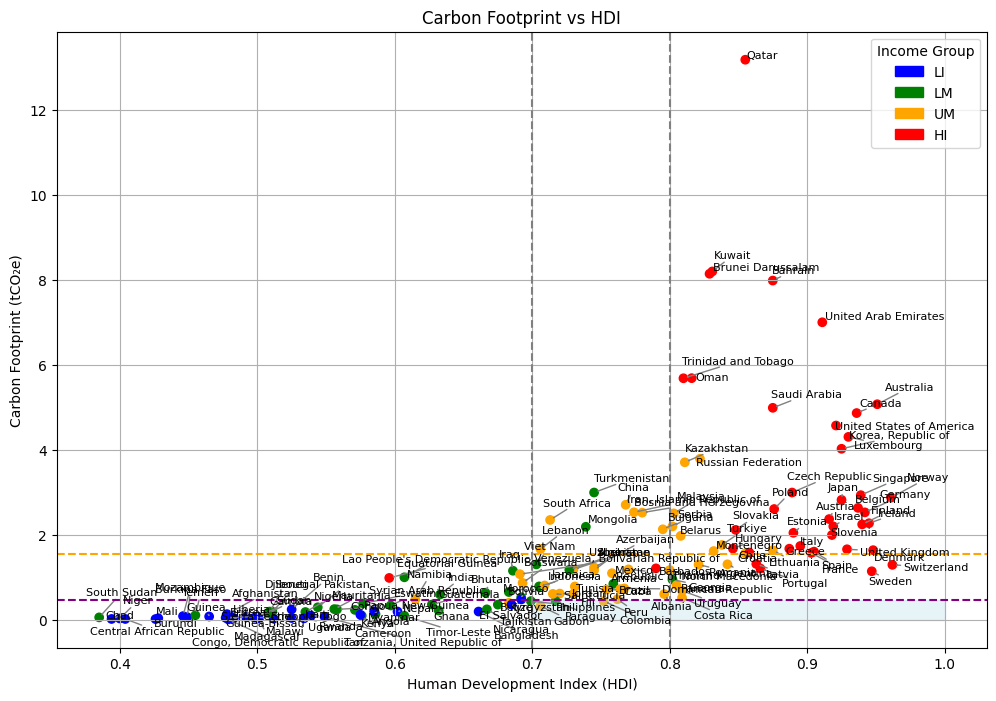

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Assuming df is your DataFrame and hdi_column is already defined
footprint_column = 'Carbon Footprint'

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development

# Global Carbon Budgets (from GCB 2022)
global_carbon_budget_1_5C = 380e9  # 380 GtCO₂ for 1.5°C target
global_carbon_budget_2C = 1230e9   # 1230 GtCO₂ for 2°C target
global_population = 8e9  # 8 billion people

# Sustainable Timeframe
sustainable_timeframe = 100  # 100 years

# Calculate sustainable annualized per capita carbon budgets
sustainable_per_capita_budget_1_5C = global_carbon_budget_1_5C / (global_population * sustainable_timeframe)
sustainable_per_capita_budget_2C = global_carbon_budget_2C / (global_population * sustainable_timeframe)

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Create a scatter plot with switched axes and colors based on income group
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Carbon Footprint (tCO₂e)')
plt.title('Carbon Footprint vs HDI')

# Add horizontal lines for sustainable annualized per capita carbon budget thresholds
plt.axhline(y=sustainable_per_capita_budget_1_5C, color='purple', linestyle='--', label=f'Sustainable Annual Per Capita Budget (1.5°C, {sustainable_per_capita_budget_1_5C:.2f} tCO₂e)')
plt.axhline(y=sustainable_per_capita_budget_2C, color='orange', linestyle='--', label=f'Sustainable Annual Per Capita Budget (2°C, {sustainable_per_capita_budget_2C:.2f} tCO₂e)')

# Add vertical lines for HDI thresholds
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_1_5C], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label all countries and adjust text to avoid overlap
texts = []
for i in range(df_cleaned.shape[0]):
    texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=8))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


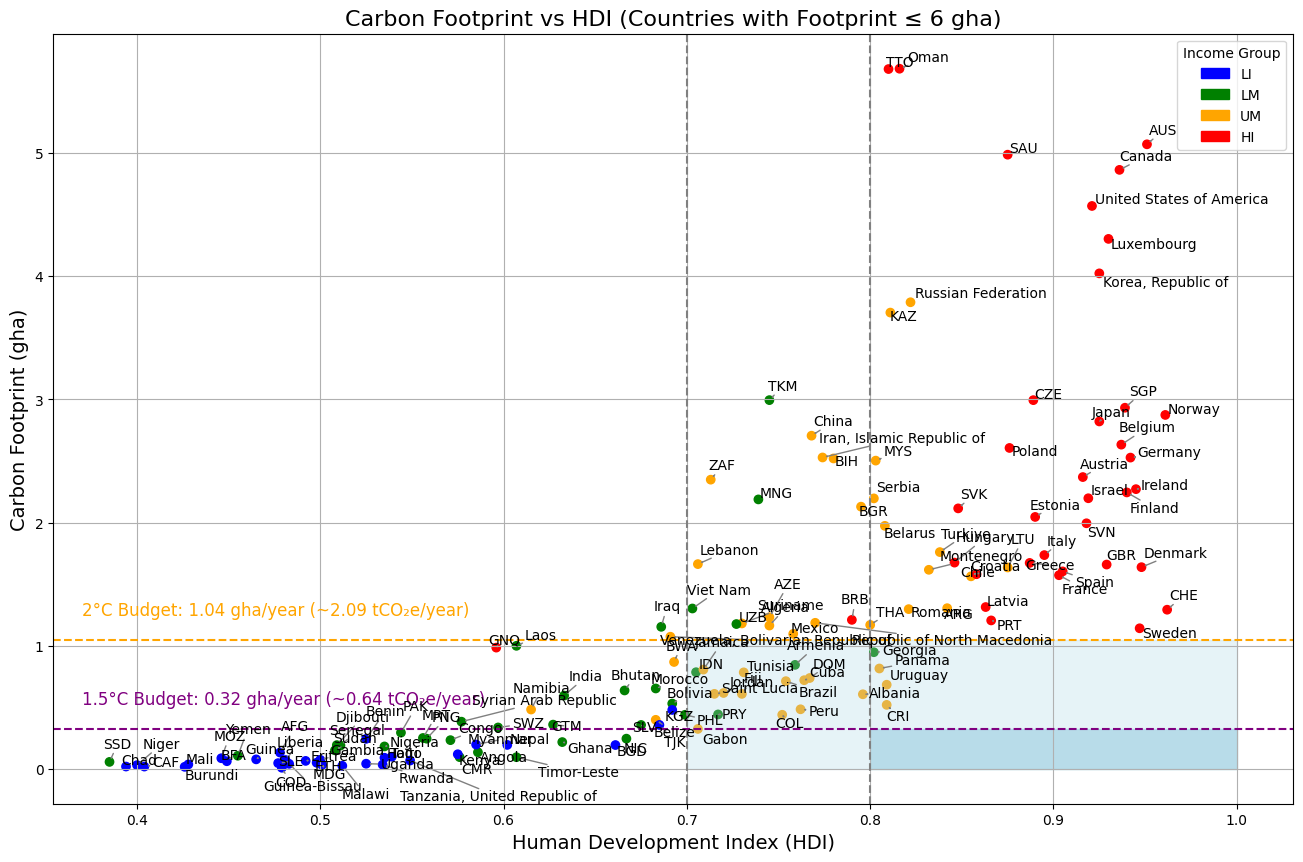

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Assuming df is your DataFrame and hdi_column is already defined
footprint_column = 'Carbon Footprint'

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Filter out countries with a carbon footprint higher than 6 tCO₂e
df_cleaned = df_cleaned[df_cleaned[footprint_column] <= 6]

# Define your country code to name mapping
country_code_to_name = {
    # Same dictionary as before...
    'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'ARM': 'Armenia',
    'AZE': 'Azerbaijan', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh', 'BRB': 'Barbados',
    'BHR': 'Bahrain', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BOL': 'Bolivia',
    'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CIV': 'Côte d\'Ivoire', 'CMR': 'Cameroon', 'COD': 'Congo, Democratic Republic of',
    'COG': 'Republic of the Congo', 'COL': 'Colombia', 'CRI': 'Costa Rica', 'CUB': 'Cuba',
    'DOM': 'Dominican Republic', 'DZA': 'Algeria', 'ECU': 'Ecuador', 'EGY': 'Egypt',
    'ETH': 'Ethiopia', 'GAB': 'Gabon', 'GEO': 'Georgia', 'GHA': 'Ghana',
    'GIN': 'Guinea', 'GTM': 'Guatemala', 'HND': 'Honduras', 'HTI': 'Haiti',
    'IDN': 'Indonesia', 'IRN': 'Iran', 'IRQ': 'Iraq', 'JAM': 'Jamaica',
    'JOR': 'Jordan', 'KAZ': 'Kazakhstan', 'KEN': 'Kenya', 'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia', 'KWT': 'Kuwait', 'Laos': 'Lao People\'s Democratic Republic', 'LBN': 'Lebanon',
    'LBR': 'Liberia', 'LBY': 'Libya', 'LKA': 'Sri Lanka', 'LSO': 'Lesotho',
    'MAR': 'Morocco', 'MDA': 'Moldova', 'MDG': 'Madagascar', 'MKD': 'North Macedonia',
    'MLI': 'Mali', 'MMR': 'Myanmar', 'MNG': 'Mongolia', 'MOZ': 'Mozambique',
    'MUS': 'Mauritius', 'MWI': 'Malawi', 'NAM': 'Namibia', 'NER': 'Niger',
    'NGA': 'Nigeria', 'NIC': 'Nicaragua', 'NPL': 'Nepal', 'OMN': 'Oman',
    'PAK': 'Pakistan', 'PER': 'Peru', 'PHL': 'Philippines', 'PNG': 'Papua New Guinea',
    'PRK': 'North Korea', 'PRY': 'Paraguay', 'PSE': 'Palestine', 'QAT': 'Qatar',
    'RWA': 'Rwanda', 'SDN': 'Sudan', 'SEN': 'Senegal', 'SLE': 'Sierra Leone',
    'SLV': 'El Salvador', 'SWZ': 'Eswatini', 'SYR': 'Syria', 'TGO': 'Togo',
    'TJK': 'Tajikistan', 'TTO': 'Trinidad and Tobago', 'TUN': 'Tunisia', 'TZA': 'Tanzania',
    'UGA': 'Uganda', 'UKR': 'Ukraine', 'URY': 'Uruguay', 'UZB': 'Uzbekistan',
    'VEN': 'Venezuela', 'VNM': 'Vietnam', 'YEM': 'Yemen', 'ZMB': 'Zambia', 'ZWE': 'Zimbabwe',
    'CHN': 'China', 'USA': 'United States', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina',
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria',
    'BRA': 'Brazil', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile',
    'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DNK': 'Denmark',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France',
    'GBR': 'United Kingdom', 'GRC': 'Greece', 'HKG': 'Hong Kong', 'HRV': 'Croatia',
    'HUN': 'Hungary', 'IND': 'India', 'IRL': 'Ireland', 'ISR': 'Israel',
    'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'South Korea', 'LTU': 'Lithuania',
    'LVA': 'Latvia', 'MEX': 'Mexico', 'MYS': 'Malaysia', 'NLD': 'Netherlands',
    'NOR': 'Norway', 'NZL': 'New Zealand', 'PAN': 'Panama', 'POL': 'Poland',
    'PRT': 'Portugal', 'ROU': 'Romania', 'RUS': 'Russia', 'SAU': 'Saudi Arabia',
    'SGP': 'Singapore', 'SRB': 'Serbia', 'SVK': 'Slovakia', 'SVN': 'Slovenia',
    'SWE': 'Sweden', 'THA': 'Thailand', 'TUR': 'Turkey', 'ZAF': 'South Africa',
    'GNQ': 'Equatorial Guinea', 'MRT': 'Mauritania', 'SSD': 'South Sudan',
    'TCD': 'Chad', 'TKM': 'Turkmenistan',
}

# Reverse the dictionary for quick lookup
name_to_code = {v: k for k, v in country_code_to_name.items()}

# Apply the rule: if a country name has more than 7 letters and has a code, use the code
df_cleaned['Country'] = df_cleaned['Country'].apply(lambda x: name_to_code[x] if len(x) > 7 and x in name_to_code else x)

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development

# From the conversion factor found online: 1 global hectare (gha) can sequester approximately 2 tCO₂ per year (1.8 to 2.4)
conversion_factor = 2  # This is an approximate value; adjust based on the most accurate data available

# Global Carbon Budgets (in tCO₂ converted to gha)
global_carbon_budget_1_5C = 380e9 / conversion_factor  # 380 GtCO₂ for 1.5°C target turned into gha
global_carbon_budget_2C = 1230e9 / conversion_factor  # 1230 GtCO₂ for 2°C target turned into gha

# Calculate sustainable annualized per capita carbon budgets in gha
global_population = df_cleaned['Population (millions)'].sum() * 1e6 #Gets the estimated population according to the dataset
sustainable_timeframe = 78  # 2100 as a sustainable target

sustainable_per_capita_budget_1_5C = global_carbon_budget_1_5C / (global_population * sustainable_timeframe) #Set the budget for 2100
sustainable_per_capita_budget_2C = global_carbon_budget_2C / (global_population * sustainable_timeframe) #Set the budget for 2100

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Adjust the figure size and aspect ratio
plt.figure(figsize=(16, 10))  # Adjusted to a wider aspect ratio

# Create a scatter plot with switched axes and colors based on income group
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)', fontsize=14)
plt.ylabel('Carbon Footprint (gha)', fontsize=14)
plt.title('Carbon Footprint vs HDI (Countries with Footprint ≤ 6 gha)', fontsize=16)

# Add horizontal lines for sustainable annualized per capita carbon budget thresholds
plt.axhline(y=sustainable_per_capita_budget_1_5C, color='purple', linestyle='--')
plt.axhline(y=sustainable_per_capita_budget_2C, color='orange', linestyle='--')

# Add labels directly on the lines with both gha and tCO₂e information
plt.text(0.37, sustainable_per_capita_budget_1_5C + 0.2, f'1.5°C Budget: {sustainable_per_capita_budget_1_5C:.2f} gha/year (~{sustainable_per_capita_budget_1_5C * conversion_factor:.2f} tCO₂e/year)', color='purple', fontsize=12, ha='left')
plt.text(0.37, sustainable_per_capita_budget_2C + 0.2, f'2°C Budget: {sustainable_per_capita_budget_2C:.2f} gha/year (~{sustainable_per_capita_budget_2C * conversion_factor:.2f} tCO₂e/year)', color='orange', fontsize=12, ha='left')


# Add vertical lines for HDI thresholds
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_1_5C], x1=hdi_threshold_2, x2=1, color='lightblue', alpha=0.8, label='Sustainable Development Quadrant')
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_2C], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label all countries and adjust text to avoid overlap
texts = []
for i in range(df_cleaned.shape[0]):
    texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=10))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


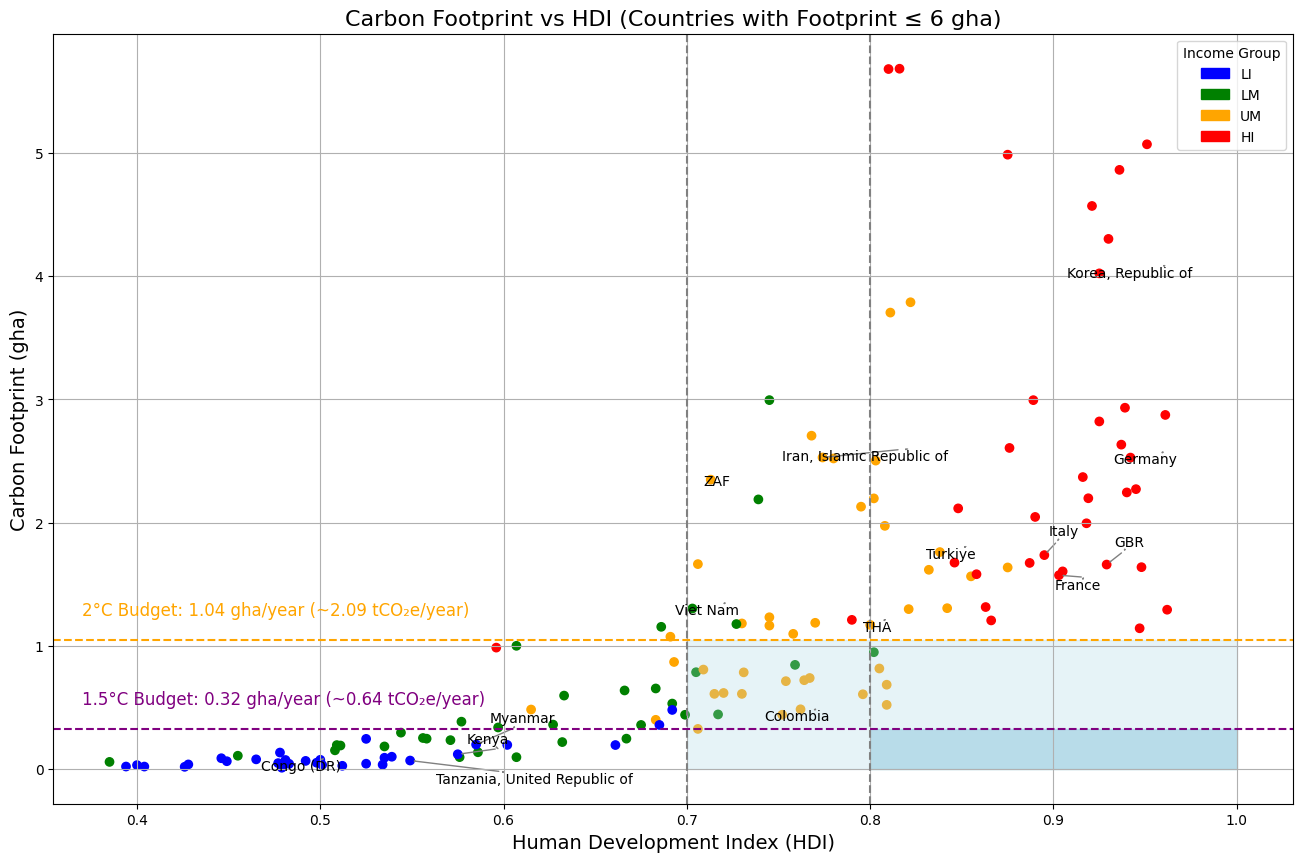

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Assuming df is your DataFrame and hdi_column is already defined
footprint_column = 'Carbon Footprint'

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Convert relevant columns to numeric, forcing errors to NaN
df[hdi_column] = pd.to_numeric(df[hdi_column], errors='coerce')
df[footprint_column] = pd.to_numeric(df[footprint_column], errors='coerce')

# Drop rows with NaN values in HDI or Footprint columns
df_cleaned = df.dropna(subset=[hdi_column, footprint_column])

# Filter out countries with a carbon footprint higher than 6 tCO₂e
df_cleaned = df_cleaned[df_cleaned[footprint_column] <= 6]

# Define your country code to name mapping
country_code_to_name = {
    # Same dictionary as before...
    'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'ARM': 'Armenia',
    'AZE': 'Azerbaijan', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'Bengladesh': 'Bangladesh', 'BRB': 'Barbados',
    'BHR': 'Bahrain', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BOL': 'Bolivia',
    'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CIV': 'Côte d\'Ivoire', 'CMR': 'Cameroon', 'Congo (DR)': 'Congo, Democratic Republic of',
    'COG': 'Republic of the Congo', 'Colombia': 'Colombia', 'CRI': 'Costa Rica', 'CUB': 'Cuba',
    'DOM': 'Dominican Republic', 'DZA': 'Algeria', 'ECU': 'Ecuador', 'EGY': 'Egypt',
    'ETH': 'Ethiopia', 'GAB': 'Gabon', 'GEO': 'Georgia', 'GHA': 'Ghana',
    'GIN': 'Guinea', 'GTM': 'Guatemala', 'HND': 'Honduras', 'HTI': 'Haiti',
    'IDN': 'Indonesia', 'IRN': 'Iran', 'IRQ': 'Iraq', 'JAM': 'Jamaica',
    'JOR': 'Jordan', 'KAZ': 'Kazakhstan', 'KEN': 'Kenya', 'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia', 'KWT': 'Kuwait', 'Laos': 'Lao People\'s Democratic Republic', 'LBN': 'Lebanon',
    'LBR': 'Liberia', 'LBY': 'Libya', 'LKA': 'Sri Lanka', 'LSO': 'Lesotho',
    'MAR': 'Morocco', 'MDA': 'Moldova', 'MDG': 'Madagascar', 'MKD': 'North Macedonia',
    'MLI': 'Mali', 'MMR': 'Myanmar', 'MNG': 'Mongolia', 'MOZ': 'Mozambique',
    'MUS': 'Mauritius', 'MWI': 'Malawi', 'NAM': 'Namibia', 'NER': 'Niger',
    'NGA': 'Nigeria', 'NIC': 'Nicaragua', 'NPL': 'Nepal', 'OMN': 'Oman',
    'PAK': 'Pakistan', 'PER': 'Peru', 'PHL': 'Philippines', 'PNG': 'Papua New Guinea',
    'PRK': 'North Korea', 'PRY': 'Paraguay', 'PSE': 'Palestine', 'QAT': 'Qatar',
    'RWA': 'Rwanda', 'SDN': 'Sudan', 'SEN': 'Senegal', 'SLE': 'Sierra Leone',
    'SLV': 'El Salvador', 'SWZ': 'Eswatini', 'SYR': 'Syria', 'TGO': 'Togo',
    'TJK': 'Tajikistan', 'TTO': 'Trinidad and Tobago', 'TUN': 'Tunisia', 'TZA': 'Tanzania',
    'UGA': 'Uganda', 'UKR': 'Ukraine', 'URY': 'Uruguay', 'UZB': 'Uzbekistan',
    'VEN': 'Venezuela', 'VNM': 'Vietnam', 'YEM': 'Yemen', 'ZMB': 'Zambia', 'ZWE': 'Zimbabwe',
    'CHN': 'China', 'USA': 'United States', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina',
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria',
    'BRA': 'Brazil', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile',
    'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DNK': 'Denmark',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France',
    'GBR': 'United Kingdom', 'GRC': 'Greece', 'HKG': 'Hong Kong', 'HRV': 'Croatia',
    'HUN': 'Hungary', 'IND': 'India', 'IRL': 'Ireland', 'ISR': 'Israel',
    'ITA': 'Italy', 'JPN': 'Japan', 'ROK': 'Korea, Republic of', 'LTU': 'Lithuania',
    'LVA': 'Latvia', 'MEX': 'Mexico', 'MYS': 'Malaysia', 'NLD': 'Netherlands',
    'NOR': 'Norway', 'NZL': 'New Zealand', 'PAN': 'Panama', 'POL': 'Poland',
    'PRT': 'Portugal', 'ROU': 'Romania', 'RUS': 'Russia', 'SAU': 'Saudi Arabia',
    'SGP': 'Singapore', 'SRB': 'Serbia', 'SVK': 'Slovakia', 'SVN': 'Slovenia',
    'SWE': 'Sweden', 'THA': 'Thailand', 'TUR': 'Turkey', 'ZAF': 'South Africa',
    'GNQ': 'Equatorial Guinea', 'MRT': 'Mauritania', 'SSD': 'South Sudan',
    'TCD': 'Chad', 'TKM': 'Turkmenistan',
}

# Reverse the dictionary for quick lookup
name_to_code = {v: k for k, v in country_code_to_name.items()}

# Apply the rule: if a country name has more than 7 letters and has a code, use the code
df_cleaned['Country'] = df_cleaned['Country'].apply(lambda x: name_to_code[x] if len(x) > 7 and x in name_to_code else x)

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development

# From the conversion factor found online: 1 global hectare (gha) can sequester approximately 2 tCO₂ per year (1.8 to 2.4)
conversion_factor = 2  # This is an approximate value; adjust based on the most accurate data available

# Global Carbon Budgets (in tCO₂ converted to gha)
global_carbon_budget_1_5C = 380e9 / conversion_factor  # 380 GtCO₂ for 1.5°C target turned into gha
global_carbon_budget_2C = 1230e9 / conversion_factor  # 1230 GtCO₂ for 2°C target turned into gha

# Calculate sustainable annualized per capita carbon budgets in gha
global_population = df_cleaned['Population (millions)'].sum() * 1e6 #Gets the estimated population according to the dataset
sustainable_timeframe = 78  # 2100 as a sustainable target

sustainable_per_capita_budget_1_5C = global_carbon_budget_1_5C / (global_population * sustainable_timeframe) #Set the budget for 2100
sustainable_per_capita_budget_2C = global_carbon_budget_2C / (global_population * sustainable_timeframe) #Set the budget for 2100

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Adjust the figure size and aspect ratio
plt.figure(figsize=(16, 10))  # Adjusted to a wider aspect ratio

# Create a scatter plot with switched axes and colors based on income group
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Add labels and title
plt.xlabel('Human Development Index (HDI)', fontsize=14)
plt.ylabel('Carbon Footprint (gha)', fontsize=14)
plt.title('Carbon Footprint vs HDI (Countries with Footprint ≤ 6 gha)', fontsize=16)

# Add horizontal lines for sustainable annualized per capita carbon budget thresholds
plt.axhline(y=sustainable_per_capita_budget_1_5C, color='purple', linestyle='--')
plt.axhline(y=sustainable_per_capita_budget_2C, color='orange', linestyle='--')

# Add labels directly on the lines with both gha and tCO₂e information
plt.text(0.37, sustainable_per_capita_budget_1_5C + 0.2, f'1.5°C Budget: {sustainable_per_capita_budget_1_5C:.2f} gha/year (~{sustainable_per_capita_budget_1_5C * conversion_factor:.2f} tCO₂e/year)', color='purple', fontsize=12, ha='left')
plt.text(0.37, sustainable_per_capita_budget_2C + 0.2, f'2°C Budget: {sustainable_per_capita_budget_2C:.2f} gha/year (~{sustainable_per_capita_budget_2C * conversion_factor:.2f} tCO₂e/year)', color='orange', fontsize=12, ha='left')


# Add vertical lines for HDI thresholds
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_1_5C], x1=hdi_threshold_2, x2=1, color='lightblue', alpha=0.8, label='Sustainable Development Quadrant')
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_2C], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label only countries with a population above 100 million
texts = []
for i in range(df_cleaned.shape[0]):
    if 50 < df_cleaned['Population (millions)'].iloc[i] <= 100:
        texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=10))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels, title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Calculate the distance to the quadrant
df_cleaned['Distance to Quadrant'] = np.sqrt(
    (df_cleaned[hdi_column] - hdi_threshold_2)**2 +
    (df_cleaned[footprint_column] - sustainable_per_capita_budget_1_5C)**2
)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Ensure all data is numeric and handle non-numeric entries
clustering_features = df_cleaned[['HDI', 'Per Capita GDP', 'Life Exectancy', 'Carbon Footprint',
                                  'Total Ecological Footprint (Consumption)', 'Population (millions)']].apply(pd.to_numeric, errors='coerce')

# Handle missing values by dropping rows with NaN values
clustering_features = clustering_features.dropna()

# Scale the data to normalize the values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df_cleaned = df_cleaned.loc[clustering_features.index]  # Keep only rows used for clustering
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


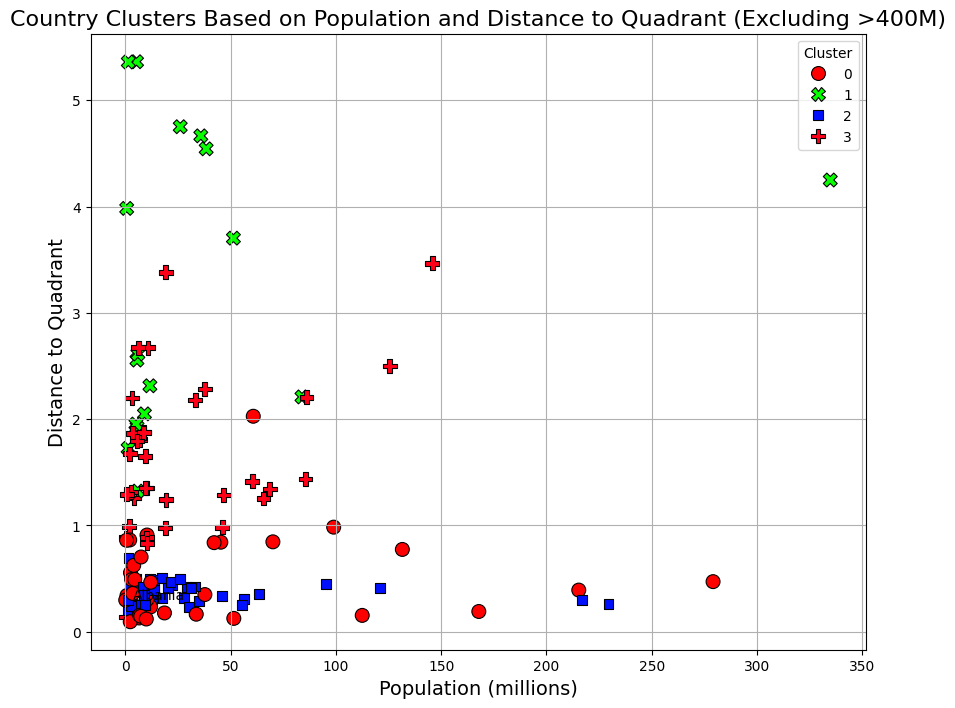

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Filter out countries with a population above 400 million
filtered_df = df_cleaned[df_cleaned['Population (millions)'] <= 400]

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the clusters
sns.scatterplot(
    x=filtered_df['Population (millions)'],
    y=filtered_df['Distance to Quadrant'],
    hue=filtered_df['Cluster'],
    palette="hsv",  # Use the hsv color palette without as_cmap
    style=filtered_df['Cluster'],
    s=100,
    edgecolor="black"
)

# Add labels and title
plt.title('Country Clusters Based on Population and Distance to Quadrant (Excluding >400M)', fontsize=16)
plt.xlabel('Population (millions)', fontsize=14)
plt.ylabel('Distance to Quadrant', fontsize=14)

# Add country names for only Bangladesh, Korea, and Albania
texts = []
for i in range(filtered_df.shape[0]):
    country_name = filtered_df['Country'].iloc[i]
    if country_name in ['Bangladesh', 'Korea', 'Albania']:
        texts.append(plt.text(filtered_df['Population (millions)'].iloc[i], filtered_df['Distance to Quadrant'].iloc[i],
                              country_name, fontsize=10))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned, hdi_column, footprint_column, and Cluster labels are already defined

# Step 1: Apply the filters to create the three groups
high_hdi_high_footprint = df_cleaned[
    (df_cleaned[hdi_column] > 0.8) &
    (df_cleaned[footprint_column] > sustainable_per_capita_budget_2C)
]

low_hdi_low_footprint = df_cleaned[
    (df_cleaned[hdi_column] < 0.7) &
    (df_cleaned[footprint_column] < sustainable_per_capita_budget_1_5C)
]

in_between = df_cleaned[
    (df_cleaned[hdi_column] >= 0.7) &
    (df_cleaned[hdi_column] <= 0.8) &
    (df_cleaned[footprint_column] >= sustainable_per_capita_budget_1_5C) &
    (df_cleaned[footprint_column] <= sustainable_per_capita_budget_2C)
]

# Function to find the country closest to the cluster centroid within a group
def find_closest_to_centroid(group, centrality_features, kmeans):
    group_centrality_features = centrality_features.loc[group.index]
    group_centroids = kmeans.cluster_centers_[group['Cluster']]
    distances = np.linalg.norm(group_centrality_features - group_centroids, axis=1)
    return group.iloc[np.argmin(distances)]

# Step 2: Select the representative country closest to the centroid for each group
selected_high_hdi_high_footprint = find_closest_to_centroid(high_hdi_high_footprint, centrality_features, kmeans)
selected_low_hdi_low_footprint = find_closest_to_centroid(low_hdi_low_footprint, centrality_features, kmeans)
selected_in_between = find_closest_to_centroid(in_between, centrality_features, kmeans)

# Step 3: Display the selected countries
selected_countries = pd.DataFrame([selected_high_hdi_high_footprint,
                                   selected_low_hdi_low_footprint,
                                   selected_in_between])

# Show the selected countries with their HDI, footprint, and cluster information
print(selected_countries[['Country', hdi_column, footprint_column, 'Cluster']])


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

# SPA & Network-based clustering

In [ ]:
#Import Data for the latest year

#Load data
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import zipfile
import agentpy as ap

def load_centrality_data():
  file_path = f'/content/drive/MyDrive/Yannis/1990-2016_centrality_analysis_results.pkl'
  with open(file_path, 'rb') as file:
    data = pickle.load(file)
  return data

# Load the data
data = load_centrality_data()

print(data.keys())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Sector', 'Country', 'Year', 'Degree Centrality',
       'Eigenvector Centrality', 'Betweenness Centrality',
       'In-Degree Centrality', 'Out-Degree Centrality', 'Bonacich Centrality'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has already been loaded

# Convert to DataFrame if not already
df_centrality = pd.DataFrame(data)

# Select the latest year
latest_year = df_centrality['Year'].max()
df_latest = df_centrality[df_centrality['Year'] == latest_year]

# Check for any missing values and handle them if necessary
df_latest = df_latest.dropna()
df_latest['Bonacich Centrality'] = df_latest['Bonacich Centrality'].apply(lambda x: x.real)


# Select the centrality columns for clustering
centrality_columns = [
    'Degree Centrality',
    'Eigenvector Centrality',
    'Betweenness Centrality',
    'In-Degree Centrality',
    'Out-Degree Centrality',
    'Bonacich Centrality'
]

# Standardize the centrality data
scaler = StandardScaler()
centrality_features = scaler.fit_transform(df_latest[centrality_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


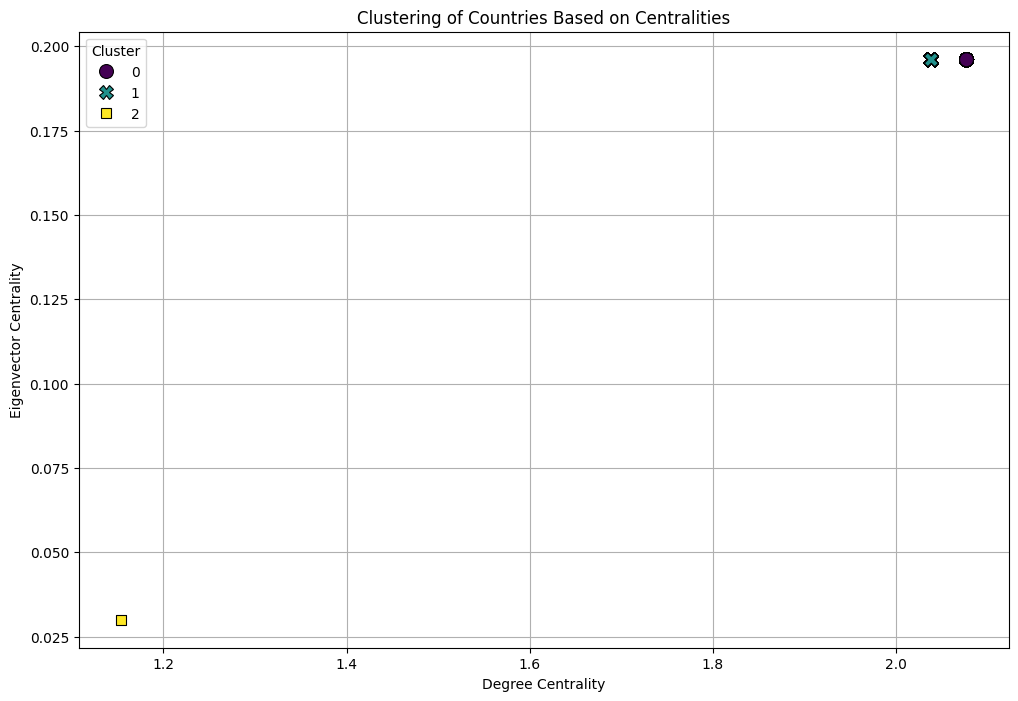

In [ ]:
# Convert complex numbers to real (taking the real part)
df_latest['Bonacich Centrality'] = df_latest['Bonacich Centrality'].apply(lambda x: x.real)

# Now proceed with the standardization and clustering
centrality_columns = [
    'Degree Centrality',
    'Eigenvector Centrality',
    'Betweenness Centrality',
    'In-Degree Centrality',
    'Out-Degree Centrality',
    'Bonacich Centrality'
]

# Standardize the centrality data
scaler = StandardScaler()
centrality_features = scaler.fit_transform(df_latest[centrality_columns])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_latest['Cluster'] = kmeans.fit_predict(centrality_features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_latest['Degree Centrality'],
    y=df_latest['Eigenvector Centrality'],
    hue=df_latest['Cluster'],
    palette='viridis',
    style=df_latest['Cluster'],
    s=100,
    edgecolor="black"
)
plt.title('Clustering of Countries Based on Centralities')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_latest already has the 'Cluster' column from the previous K-Means clustering

# Group by the cluster and select the country closest to the cluster centroid
def find_representative_countries(df, centrality_features, kmeans):
    representative_countries = []
    for cluster in range(kmeans.n_clusters):
        cluster_points = centrality_features[df['Cluster'] == cluster]
        cluster_countries = df[df['Cluster'] == cluster]['Country']

        # Compute the distance to the cluster centroid
        centroid = kmeans.cluster_centers_[cluster]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)

        # Find the index of the minimum distance
        min_distance_idx = np.argmin(distances)

        # Select the corresponding country
        representative_countries.append(cluster_countries.iloc[min_distance_idx])

    return representative_countries

# Find the representative countries for each cluster
representative_countries = find_representative_countries(df_latest, centrality_features, kmeans)

# Display the selected countries
for i, country in enumerate(representative_countries):
    print(f"Representative country for Cluster {i}: {country}")


Representative country for Cluster 0: AFG
Representative country for Cluster 1: AFG
Representative country for Cluster 2: ROW


**Well, not very useful eh...**

---



In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned, hdi_column, footprint_column, and Cluster labels are already defined

# Step 1: Apply the filters to create the three groups
high_hdi_high_footprint = df_cleaned[
    (df_cleaned[hdi_column] > 0.8) &
    (df_cleaned[footprint_column] > sustainable_per_capita_budget_2C)
]

low_hdi_low_footprint = df_cleaned[
    (df_cleaned[hdi_column] < 0.7) &
    (df_cleaned[footprint_column] < sustainable_per_capita_budget_1_5C)
]

in_between = df_cleaned[
    (df_cleaned[hdi_column] >= 0.7) &
    (df_cleaned[hdi_column] <= 0.8) &
    (df_cleaned[footprint_column] >= sustainable_per_capita_budget_1_5C) &
    (df_cleaned[footprint_column] <= sustainable_per_capita_budget_2C)
]

# Function to find the country closest to the cluster centroid within a group
def find_closest_to_centroid(group, centrality_features, kmeans):
    # Ensure that the cluster label is within the valid range
    valid_clusters = group['Cluster'].isin(range(len(kmeans.cluster_centers_)))
    group = group[valid_clusters]

    if group.empty:
        raise ValueError("No valid clusters found in the group.")

    group_centrality_features = centrality_features[group.index]
    group_centroids = kmeans.cluster_centers_[group['Cluster'].values]

    # Calculate distances to the cluster centroid
    distances = np.linalg.norm(group_centrality_features - group_centroids, axis=1)
    return group.iloc[np.argmin(distances)]

# Step 2: Select the representative country closest to the centroid for each group
try:
    selected_high_hdi_high_footprint = find_closest_to_centroid(high_hdi_high_footprint, centrality_features, kmeans)
    selected_low_hdi_low_footprint = find_closest_to_centroid(low_hdi_low_footprint, centrality_features, kmeans)
    selected_in_between = find_closest_to_centroid(in_between, centrality_features, kmeans)

    # Step 3: Display the selected countries
    selected_countries = pd.DataFrame([selected_high_hdi_high_footprint,
                                       selected_low_hdi_low_footprint,
                                       selected_in_between])

    # Show the selected countries with their HDI, footprint, and cluster information
    print(selected_countries[['Country', hdi_column, footprint_column, 'Cluster']])
except ValueError as e:
    print(f"Error: {e}")


21      Country    HDI  Carbon Footprint  Cluster
168         SGP  0.939          2.932318        1
33   Bengladesh  0.661          0.192397        0
23      Albania  0.796          0.604783        0


**This approach works, so let's iterate over different combinations**

---



In [ ]:
from scipy.spatial.distance import cdist

def find_closest_to_centroid_single_metric(group, centroids, kmeans, df_centrality):
    # Extract Bonacich Centrality values for the group
    group_centrality_features = df_centrality.loc[group.index, 'Bonacich Centrality'].values.reshape(-1, 1)

    # Find the cluster centroid for the group's cluster (only Bonacich Centrality)
    cluster_idx = group['Cluster'].unique()[0]  # Assuming each group is in one cluster
    if cluster_idx >= centroids.shape[0]:
        raise ValueError(f"Cluster {cluster_idx} is out of bounds for centroids with shape {centroids.shape}.")

    group_centroid = centroids[cluster_idx].reshape(1, -1)

    # Calculate distances to the centroid
    distances = np.linalg.norm(group_centrality_features - group_centroid, axis=1)

    # Return the country closest to the centroid
    return group.iloc[np.argmin(distances)]

# Get the centroids from the k-means model (focus on the Bonacich centrality column)
centroids_bonacich = kmeans.cluster_centers_[:, -1].reshape(-1, 1)

# Find the closest country in each group to its Bonacich centroid
closest_high_hdi_high_footprint = find_closest_to_centroid_single_metric(high_hdi_high_footprint, centroids_bonacich, kmeans, df_centrality)
closest_low_hdi_low_footprint = find_closest_to_centroid_single_metric(low_hdi_low_footprint, centroids_bonacich, kmeans, df_centrality)
closest_in_between = find_closest_to_centroid_single_metric(in_between, centroids_bonacich, kmeans, df_centrality)

# Combine the results
selected_countries = pd.DataFrame([closest_high_hdi_high_footprint, closest_low_hdi_low_footprint, closest_in_between])

# Display the selected countries
print(selected_countries[['Country', 'HDI', 'Carbon Footprint', 'Cluster']])


ValueError: Cluster 3 is out of bounds for centroids with shape (3, 1).

**Try to compute the centralities again**

---



In [ ]:
!pip install agentpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Load data
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import zipfile
import agentpy as ap
import zipfile

def load_variables(year):
    # Path to the ZIP file
    zip_file_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp.zip'

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as z:
            # Read specific files into DataFrames
            with z.open(f'Eora26_{year}_bp_T.txt') as file:
                Eora_pp_T = pd.read_csv(file, sep='\t', header=None)

            with z.open(f'Eora26_{year}_bp_FD.txt') as file:
                Eora_pp_FD = pd.read_csv(file, sep='\t', header=None)

            with z.open(f'Eora26_{year}_bp_VA.txt') as file:
                Eora_pp_VA = pd.read_csv(file, sep='\t', header=None)

            with z.open(f'Eora26_{year}_bp_Q.txt') as file:
                Eora_pp_Q = pd.read_csv(file, sep='\t', header=None)

            with z.open(f'Eora26_{year}_bp_QY.txt') as file:
                Eora_pp_QY = pd.read_csv(file, sep='\t', header=None)

            # Also read the label files if needed
            with z.open('labels_T.txt') as file:
                labels_T = pd.read_csv(file, sep='\t', header=None)

            with z.open('labels_FD.txt') as file:
                labels_FD = pd.read_csv(file, sep='\t', header=None)

            with z.open('labels_VA.txt') as file:
                labels_VA = pd.read_csv(file, sep='\t', header=None)

            with z.open('labels_Q.txt') as file:
                labels_Q = pd.read_csv(file, sep='\t', header=None)

        # Return all the DataFrames as a dictionary
        data = {
            'Eora_pp_T': Eora_pp_T,
            'Eora_pp_FD': Eora_pp_FD,
            'Eora_pp_VA': Eora_pp_VA,
            'Eora_pp_Q': Eora_pp_Q,
            'Eora_pp_QY': Eora_pp_QY,
            'labels_T': labels_T,
            'labels_FD': labels_FD,
            'labels_VA': labels_VA,
            'labels_Q': labels_Q
        }
        return data

    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
data = load_variables(2015)

# Accessing the data
if data:
    print(data['Eora_pp_T'].head())  # Example: print the first few rows of the transaction matrix


# Function to compute centrality measures
def compute_centralities(G):
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    bonacich_centrality = nx.katz_centrality_numpy(G, alpha=0.1)

    return {
        'eigenvector': eigenvector_centrality,
        'betweenness': betweenness_centrality,
        'degree': degree_centrality,
        'bonacich': bonacich_centrality
    }

# Create directed graph from the transaction matrix T
def create_network(T, labels_T):
    G = nx.DiGraph()
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            if T.iloc[i, j] != 0:
                G.add_edge(labels_T.iloc[i, 3], labels_T.iloc[j, 3], weight=T.iloc[i, j])
    return G

T = data['Eora_pp_T']
labels_T = data['labels_T']

# Step 1: Create the network and compute centralities
G = create_network(T, labels_T)
centrality = compute_centralities(G)

# Step 2: Prepare the data for clustering
df_centrality = pd.DataFrame({
    'Sector': labels_T.iloc[:, 3],
    'Country': labels_T.iloc[:, 1],
    'Eigenvector Centrality': pd.Series(centrality['eigenvector']),
    'Betweenness Centrality': pd.Series(centrality['betweenness']),
    'Degree Centrality': pd.Series(centrality['degree']),
    'Bonacich Centrality': pd.Series(centrality['bonacich']),
})

# Standardize the centrality measures
scaler = StandardScaler()
centrality_features = scaler.fit_transform(df_centrality.iloc[:, 2:])

# Step 3: Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_centrality['Cluster'] = kmeans.fit_predict(centrality_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_centrality['Eigenvector Centrality'],
    y=df_centrality['Degree Centrality'],
    hue=df_centrality['Cluster'],
    palette='viridis',
    style=df_centrality['Cluster'],
    s=100,
    edgecolor="black"
)
plt.title('Network-Informed Clustering of Country-Sectors')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Degree Centrality')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        0         1            2           3            4            5     \
0  98135.000   23.3912    481.40800  263800.000   3481.13000  38668.70000   
1    146.124  418.2400      3.02963   31776.600      5.52303      1.92515   
2   1193.790   31.0448  10299.00000     586.267     64.22560    593.95900   
3  32196.500  416.6470     61.42260  161090.000   1470.78000   1072.85000   
4   1275.820  181.8970    400.05500    1973.500  50932.00000   4172.92000   

         6          7           8           9     ...      4905      4906  \
0   3500.4400   174.5720   242.70700    28.74640  ...  0.122587  0.114826   
1     41.1838    21.4997     3.23752     1.60603  ...  0.076677  0.076666   
2  55635.0000  5435.5700   174.25400   263.95900  ...  0.089156  0.083872   
3   4144.2500    25.4601    50.62130    13.86840  ...  0.076752  0.076741   
4   5421.4000   792.327

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Other clustering but without having to compute the network again**

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0.5, 1.0, 'Elbow Method')

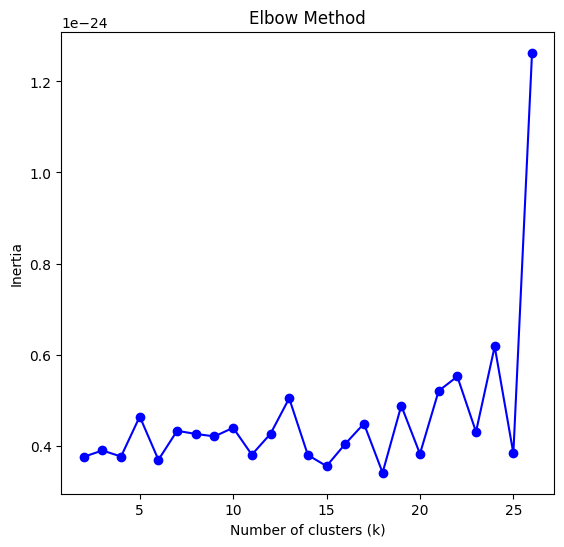

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Define k_values for the range of clusters to evaluate
k_values = range(2, 27)  # This should start from 2 because silhouette scores require at least 2 clusters

# Drop rows with NaN values in centrality features
centrality_features = centrality_features[~np.isnan(centrality_features).any(axis=1)]
df_centrality = df_centrality.dropna(subset=df_centrality.columns[2:])

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Run Elbow Method and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(centrality_features)
    inertia_values.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(centrality_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(14, 6))

# Plot Elbow Method (Inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

After optimizing the k, we choose the K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


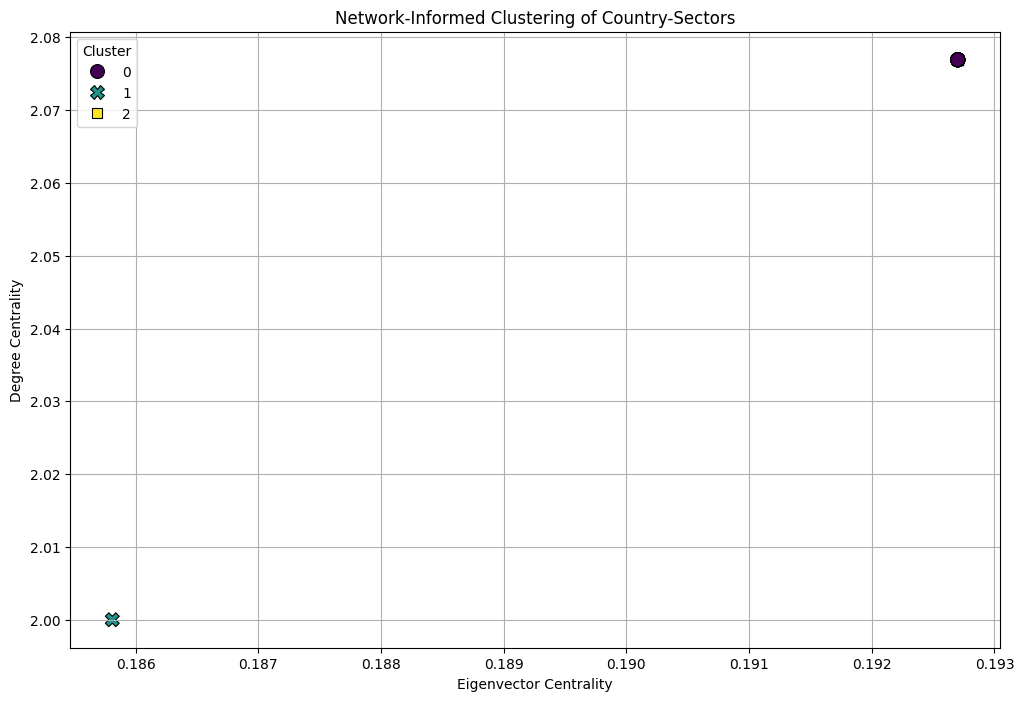

In [ ]:

# Step 3: Perform clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust the number of clusters as needed
df_centrality['Cluster'] = kmeans.fit_predict(centrality_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_centrality['Eigenvector Centrality'],
    y=df_centrality['Degree Centrality'],
    hue=df_centrality['Cluster'],
    palette='viridis',
    style=df_centrality['Cluster'],
    s=100,
    edgecolor="black"
)
plt.title('Network-Informed Clustering of Country-Sectors')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Degree Centrality')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Then we choose the three countries.

In [ ]:
# Filter 1: High HDI (>0.8) but too high footprint (above 2°C budget)
high_hdi_high_footprint = df_cleaned[
    (df_cleaned[hdi_column] > 0.8) &
    (df_cleaned[footprint_column] > sustainable_per_capita_budget_2C)
]

# Filter 2: Low HDI (<0.7) and low footprint (below 1.5°C budget)
low_hdi_low_footprint = df_cleaned[
    (df_cleaned[hdi_column] < 0.7) &
    (df_cleaned[footprint_column] < sustainable_per_capita_budget_1_5C)
]

# Filter 3: In-between (HDI between 0.7 and 0.8, footprint between 1.5°C and 2°C budgets)
in_between = df_cleaned[
    (df_cleaned[hdi_column] >= 0.7) &
    (df_cleaned[hdi_column] <= 0.8) &
    (df_cleaned[footprint_column] >= sustainable_per_capita_budget_1_5C) &
    (df_cleaned[footprint_column] <= sustainable_per_capita_budget_2C)
]

from scipy.spatial.distance import cdist

# Compute the distance to the centroid for each country
df_centrality['Distance to Centroid'] = np.nan

for cluster_num in range(kmeans.n_clusters):
    # Get the centroid for the current cluster
    centroid = kmeans.cluster_centers_[cluster_num]

    # Get the indices of countries in this cluster
    cluster_indices = df_centrality[df_centrality['Cluster'] == cluster_num].index

    # Calculate the distance of each country to the centroid
    distances = cdist(centrality_features[cluster_indices], centroid.reshape(1, -1))

    # Store the distances
    df_centrality.loc[cluster_indices, 'Distance to Centroid'] = distances.flatten()

# Filter 1: High HDI (>0.8) but too high footprint (above 2°C budget)
high_hdi_high_footprint = df_cleaned[
    (df_cleaned[hdi_column] > 0.8) &
    (df_cleaned[footprint_column] > sustainable_per_capita_budget_2C)
]

# Filter 2: Low HDI (<0.7) and low footprint (below 1.5°C budget)
low_hdi_low_footprint = df_cleaned[
    (df_cleaned[hdi_column] < 0.7) &
    (df_cleaned[footprint_column] < sustainable_per_capita_budget_1_5C)
]

# Filter 3: In-between (HDI between 0.7 and 0.8, footprint between 1.5°C and 2°C budgets)
in_between = df_cleaned[
    (df_cleaned[hdi_column] >= 0.7) &
    (df_cleaned[hdi_column] <= 0.8) &
    (df_cleaned[footprint_column] >= sustainable_per_capita_budget_1_5C) &
    (df_cleaned[footprint_column] <= sustainable_per_capita_budget_2C)
]

# Select the most representative country from each group (closest to centroid)
selected_high_hdi_high_footprint = high_hdi_high_footprint.loc[
    high_hdi_high_footprint['Distance to Centroid'].idxmin()
]
selected_low_hdi_low_footprint = low_hdi_low_footprint.loc[
    low_hdi_low_footprint['Distance to Centroid'].idxmin()
]
selected_in_between = in_between.loc[
    in_between['Distance to Centroid'].idxmin()
]

# Display the selected countries
selected_countries = pd.DataFrame([selected_high_hdi_high_footprint,
                                   selected_low_hdi_low_footprint,
                                   selected_in_between])

# Show the selected countries


# Display the selected countries
selected_countries = pd.DataFrame([selected_high_hdi_high_footprint,
                                   selected_low_hdi_low_footprint,
                                   selected_in_between])

# Show the selected countries
selected_countries[['Country', hdi_column, footprint_column, 'Cluster']]


KeyError: 'Cluster'

# Import or Export Biomass ?

In [ ]:
df_cleaned.keys()

Index(['Country', 'Data Quality', 'SDGi', 'Life Exectancy', 'HDI',
       'Per Capita GDP', 'Region', 'Income Group', 'Population (millions)',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Product Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Production)',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Total biocapacity ',
       'Ecological (Deficit) or Reserve', 'Number of Earths required',
       'Number of Countries required',
       'calculated\nCountry Overshoot Day \n2022',
       'Total Ecological Footprint', 'footprint', 'Color',
       'Distance to Quadrant', 'Cluster'],
      dtype='object', name=21)

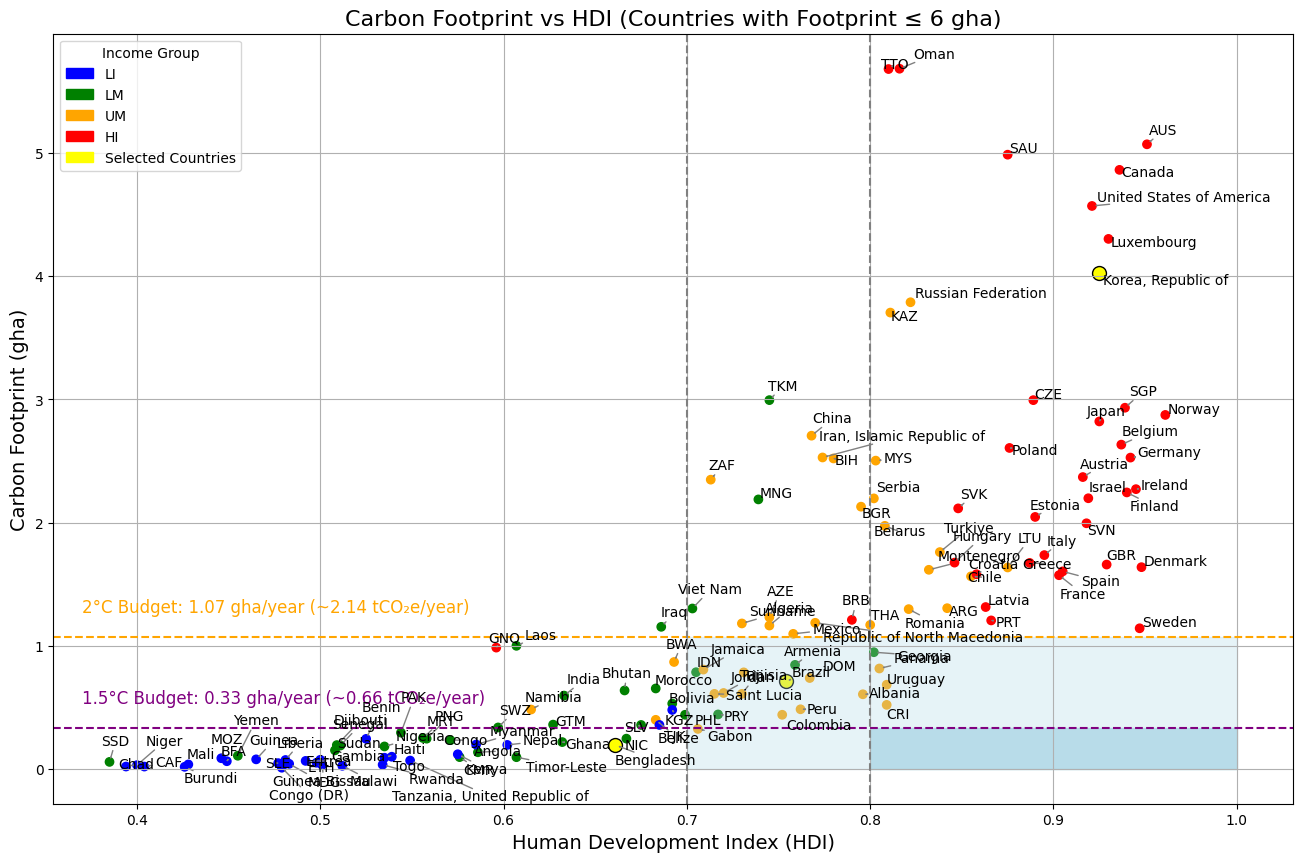

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Assuming df_cleaned is your DataFrame after filtering

# Define the selected countries
selected_countries = ['Korea, Republic of', 'Brazil', 'Bengladesh']

# Filter the dataframe for the selected countries
selected_df = df_cleaned[df_cleaned['Country'].isin(selected_countries)]

# Set the threshold values
hdi_threshold = 0.7  # High Human Development
hdi_threshold_2 = 0.8  # Very High Human Development

# Global Carbon Budgets (in tCO₂ converted to gha)
conversion_factor = 2  # This is an approximate value; adjust based on the most accurate data available
global_population = df_cleaned['Population (millions)'].sum() * 1e6  # Gets the estimated population according to the dataset
sustainable_timeframe = 78  # 2100 as a sustainable target
global_carbon_budget_1_5C = 380e9 / conversion_factor
global_carbon_budget_2C = 1230e9 / conversion_factor
sustainable_per_capita_budget_1_5C = global_carbon_budget_1_5C / (global_population * sustainable_timeframe)
sustainable_per_capita_budget_2C = global_carbon_budget_2C / (global_population * sustainable_timeframe)

# Create a color map for income groups
income_group_colors = {
    'LI': 'blue',   # Low Income
    'LM': 'green',  # Lower-Middle Income
    'UM': 'orange', # Upper-Middle Income
    'HI': 'red'     # High Income
}

# Map colors to the "Income Group" column
df_cleaned['Color'] = df_cleaned['Income Group'].map(income_group_colors)

# Plot the scatter plot
plt.figure(figsize=(16, 10))  # Adjusted to a wider aspect ratio
plt.scatter(df_cleaned[hdi_column], df_cleaned[footprint_column], color=df_cleaned['Color'])

# Highlight the selected countries
plt.scatter(selected_df[hdi_column], selected_df[footprint_column], color='yellow', s=100, edgecolor='black', label='Selected Countries')

# Add labels and title
plt.xlabel('Human Development Index (HDI)', fontsize=14)
plt.ylabel('Carbon Footprint (gha)', fontsize=14)
plt.title('Carbon Footprint vs HDI (Countries with Footprint ≤ 6 gha)', fontsize=16)

# Add horizontal lines for sustainable annualized per capita carbon budget thresholds
plt.axhline(y=sustainable_per_capita_budget_1_5C, color='purple', linestyle='--')
plt.axhline(y=sustainable_per_capita_budget_2C, color='orange', linestyle='--')

# Add labels directly on the lines with both gha and tCO₂e information
plt.text(0.37, sustainable_per_capita_budget_1_5C + 0.2, f'1.5°C Budget: {sustainable_per_capita_budget_1_5C:.2f} gha/year (~{sustainable_per_capita_budget_1_5C * conversion_factor:.2f} tCO₂e/year)', color='purple', fontsize=12, ha='left')
plt.text(0.37, sustainable_per_capita_budget_2C + 0.2, f'2°C Budget: {sustainable_per_capita_budget_2C:.2f} gha/year (~{sustainable_per_capita_budget_2C * conversion_factor:.2f} tCO₂e/year)', color='orange', fontsize=12, ha='left')

# Add vertical lines for HDI thresholds
plt.axvline(x=hdi_threshold, color='gray', linestyle='--', label='High Human Development Threshold (HDI = 0.7)')
plt.axvline(x=hdi_threshold_2, color='gray', linestyle='--', label='Very High Human Development Threshold (HDI = 0.8)')

# Shade the Global Sustainable Development Quadrant (bottom-right)
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_1_5C], x1=hdi_threshold_2, x2=1, color='lightblue', alpha=0.8, label='Sustainable Development Quadrant')
plt.fill_betweenx(y=[0, sustainable_per_capita_budget_2C], x1=hdi_threshold, x2=1, color='lightblue', alpha=0.3, label='Sustainable Development Quadrant')

# Label all countries and adjust text to avoid overlap
texts = []
for i in range(df_cleaned.shape[0]):
    texts.append(plt.text(df_cleaned[hdi_column].iloc[i], df_cleaned[footprint_column].iloc[i], df_cleaned['Country'].iloc[i], fontsize=10))

# Adjust the text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Create a custom legend for income groups
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=color, label=group) for group, color in income_group_colors.items()]
plt.legend(handles=legend_labels + [mpatches.Patch(color='yellow', label='Selected Countries')], title='Income Group', loc='best')

# Show the plot
plt.grid(True)
plt.show()


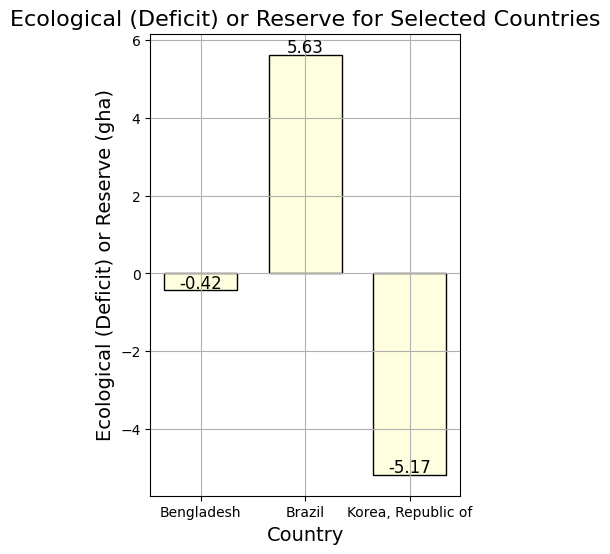

In [ ]:
# Plot 'Ecological (Deficit) or Reserve' for selected countries with thinner bars
plt.figure(figsize=(4, 6))

# Adjust the width of the bars to make them thinner
bar_width = 0.7

plt.bar(selected_df['Country'], selected_df['Ecological (Deficit) or Reserve'], color='lightyellow', edgecolor='black', width=bar_width)

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Ecological (Deficit) or Reserve (gha)', fontsize=14)
plt.title('Ecological (Deficit) or Reserve for Selected Countries', fontsize=16)

# Annotate the values on the bars
for i in range(len(selected_df)):
    plt.text(i, selected_df['Ecological (Deficit) or Reserve'].iloc[i] + 0.05, f"{selected_df['Ecological (Deficit) or Reserve'].iloc[i]:.2f}", ha='center', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()
